In [61]:
#%pip install tueplots

In [3]:
%matplotlib inline
import os

import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from tueplots import bundles
from tueplots.constants.color import rgb

In [2]:
os.getenv("DATASET_PATH")

In [4]:
#final_df = pd.read_csv(os.getenv("DATASET_PATH"), index_col=0)
final_df = pd.read_csv('../all_data/all-data-best-city.csv', index_col=0)

In [25]:
final_df['city_ascii'] = final_df['city_ascii'].str.strip()

In [26]:
final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852


In [5]:
# Min-Max Scaling all our indexes
final_df['scaled_cost_live_rent_index'] = 1 - ( (final_df['cost_live_rent_index'] - final_df['cost_live_rent_index'].min()) /
                                           (final_df['cost_live_rent_index'].max() - final_df['cost_live_rent_index'].min()) )
final_df['scaled_purchase_pow_index'] = ( (final_df['purchase_pow_index'] - final_df['purchase_pow_index'].min()) /
                                           (final_df['purchase_pow_index'].max() - final_df['purchase_pow_index'].min()) )
final_df['scaled_safety_index'] = ( (final_df['safety_index'] - final_df['safety_index'].min()) /
                                           (final_df['safety_index'].max() - final_df['safety_index'].min()) )
final_df['scaled_pollution_index'] = 1 - ( (final_df['pollution_index'] - final_df['pollution_index'].min()) /
                                           (final_df['pollution_index'].max() - final_df['pollution_index'].min()) )
final_df['scaled_trffic_min_index'] = 1 - ( (final_df['trffic_min_index'] - final_df['trffic_min_index'].min()) /
                                           (final_df['trffic_min_index'].max() - final_df['trffic_min_index'].min()) )
final_df['scaled_mean_tmp'] = ( (final_df['mean_tmp'] - final_df['mean_tmp'].min()) /
                                           (final_df['mean_tmp'].max() - final_df['mean_tmp'].min()) )
final_df['scaled_tmp_std_dev'] = ( (final_df['std_dev_temp'] - final_df['std_dev_temp'].min()) /
                                           (final_df['std_dev_temp'].max() - final_df['std_dev_temp'].min()) )

final_df['scaled_cost_live_rent_index'] = ( (final_df['scaled_cost_live_rent_index'] - final_df['scaled_cost_live_rent_index'].mean()) /
                                           final_df['scaled_cost_live_rent_index'].std() )
final_df['scaled_purchase_pow_index'] = ( (final_df['scaled_purchase_pow_index'] - final_df['scaled_purchase_pow_index'].mean()) /
                                           final_df['scaled_purchase_pow_index'].std() )
final_df['scaled_safety_index'] = ( (final_df['scaled_safety_index'] - final_df['scaled_safety_index'].mean()) /
                                           final_df['scaled_safety_index'].std() )
final_df['scaled_pollution_index'] = ( (final_df['scaled_pollution_index'] - final_df['scaled_pollution_index'].mean()) /
                                           final_df['scaled_pollution_index'].std() )
final_df['scaled_trffic_min_index'] = ( (final_df['scaled_trffic_min_index'] - final_df['scaled_trffic_min_index'].mean()) /
                                           final_df['scaled_trffic_min_index'].std() )
final_df['scaled_mean_tmp'] = ( (final_df['scaled_mean_tmp'] - final_df['scaled_mean_tmp'].mean()) /
                                           final_df['scaled_mean_tmp'].std() )
final_df['scaled_tmp_std_dev'] = ( (final_df['scaled_tmp_std_dev'] - final_df['scaled_tmp_std_dev'].mean()) /
                                           final_df['scaled_tmp_std_dev'].std() )

final_df = final_df.drop(['cost_live_rent_index', 'purchase_pow_index', 'safety_index', 'pollution_index',
                          'trffic_min_index', 'city_ascii', 'country', 'lat', 'lng'],
                         axis=1)
final_df.head()

,mean_tmp,std_dev_temp,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
0,25.441667,1.837220,-1.893426,0.192068,-0.160940,0.704606,-0.319090,1.501799,-1.536880
1,11.316667,5.142662,-2.052880,1.244113,-0.620860,0.814225,-0.909155,-0.990130,-0.133273
2,13.141667,5.418396,-1.292818,0.028073,1.132169,1.224105,-0.515778,-0.668164,-0.016187
3,17.208333,4.416798,-1.053637,-0.027624,0.778897,1.176445,-0.712467,0.049276,-0.441500
4,12.063636,8.341855,-1.978468,1.188417,0.305646,0.928611,-0.865446,-0.858350,1.225217


In [6]:
final_df.columns

Index(['mean_tmp', 'std_dev_temp', 'scaled_cost_live_rent_index',
       'scaled_purchase_pow_index', 'scaled_safety_index',
       'scaled_pollution_index', 'scaled_trffic_min_index', 'scaled_mean_tmp',
       'scaled_tmp_std_dev'],
      dtype='object')

In [7]:
final_df.columns.tolist()[2:]

['scaled_cost_live_rent_index',
 'scaled_purchase_pow_index',
 'scaled_safety_index',
 'scaled_pollution_index',
 'scaled_trffic_min_index',
 'scaled_mean_tmp',
 'scaled_tmp_std_dev']

In [15]:
final_df.describe()

,mean_tmp,std_dev_temp,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,16.929022,5.456515,26.269406,6.210760,0.570639,0.418397,0.553281,0.540156,0.613195,0.400463,0.510946
std,5.668299,2.354963,28.471539,79.900214,0.238457,0.238509,0.224254,0.270383,0.194713,0.291180,0.237944
min,9.133333,0.399621,-41.288900,-157.846000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.051894,3.910059,19.344000,-71.704325,0.374842,0.183948,0.414051,0.338918,0.501596,0.149926,0.354693
50%,15.822500,5.658067,36.896650,16.177900,0.631179,0.432472,0.546338,0.553479,0.627660,0.343622,0.531311
75%,20.875000,7.495350,45.477400,50.223625,0.777250,0.603321,0.732063,0.776740,0.764894,0.603168,0.716949
max,28.600000,10.296734,59.950000,174.777200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
final_df.columns.tolist()

['mean_tmp',
 'std_dev_temp',
 'scaled_cost_live_rent_index',
 'scaled_purchase_pow_index',
 'scaled_safety_index',
 'scaled_pollution_index',
 'scaled_trffic_min_index',
 'scaled_mean_tmp',
 'scaled_tmp_std_dev']

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap

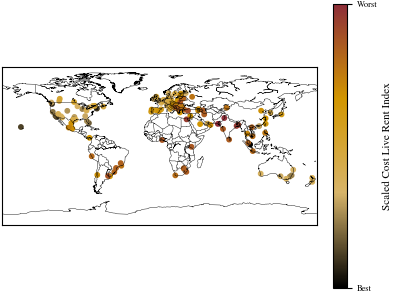

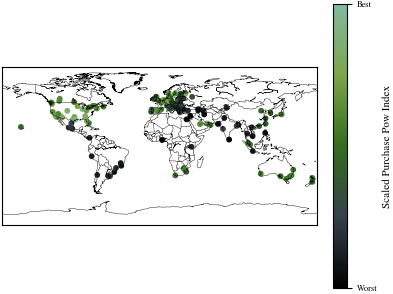

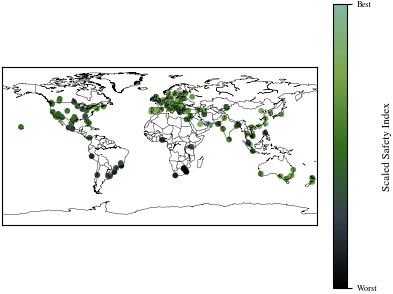

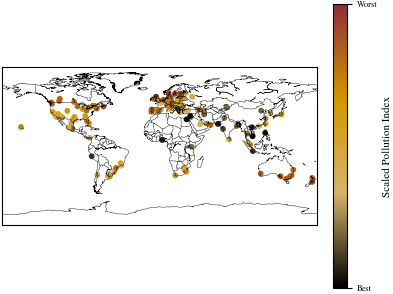

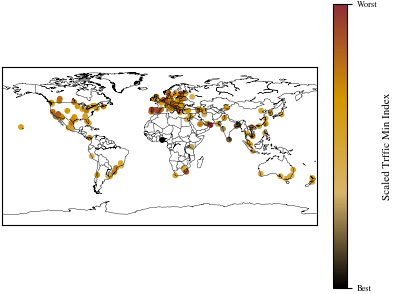

In [72]:
# Create a customized colormap using tueplot.color
cmap_blue = LinearSegmentedColormap.from_list(name='cmap_blue', colors=['black', rgb.tue_dark, rgb.tue_darkgreen, rgb.tue_green, rgb.tue_lightgreen])
cmap_red = LinearSegmentedColormap.from_list(name='cmap_red', colors=['black', rgb.tue_lightorange, rgb.tue_orange, rgb.tue_red])

# List of features to plot with red color
red_features = ['scaled_cost_live_rent_index', 'scaled_pollution_index', 'scaled_trffic_min_index']

# Get all features
all_features = final_df.columns.tolist()[2:7]

# Remove red features from all features to get green features
green_features = [feature for feature in all_features if feature not in red_features]

for feature in all_features:
    # Create a figure and axes
    plt.rcParams.update(bundles.icml2022(column="half", nrows=4, ncols=3, usetex=False))
    fig, ax = plt.subplots(figsize=(4,3))
    # Create a basemap of the world
    m = Basemap(projection='cyl', resolution='c', ax=ax)

    # Draw coastlines and countries with thinner lines
    m.drawcoastlines(linewidth=0.3)
    m.drawcountries(linewidth=0.3)

    # Convert latitudes and longitudes to map projection coordinates
    x, y = m(final_df['lng'].values, final_df['lat'].values)

    # Create a scatter plot on the map
    if feature in red_features:
        sc = ax.scatter(x, y, c=final_df[feature], cmap=cmap_red, s=10)
        cbar_r = plt.colorbar(sc, label=feature.replace('_', ' ').title())
        cbar_r.ax.set_yticks([0,1])
        cbar_r.ax.set_yticklabels(['Best', 'Worst'])
        plt.savefig(feature + '.pdf')
    else:
        sc = ax.scatter(x, y, c=final_df[feature], cmap=cmap_blue, s=10)
        cbar_g=plt.colorbar(sc, label=feature.replace('_', ' ').title())
        cbar_g.ax.set_yticks([0,1])
        cbar_g.ax.set_yticklabels(['Worst', 'Best'])
        plt.savefig(feature + '.pdf')

    # Show the plot
    plt.show()

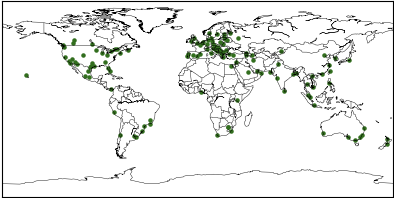

In [23]:
# Create a figure and axes
plt.rcParams.update(bundles.icml2022(column="half", nrows=4, ncols=3, usetex=False))
fig, ax = plt.subplots(figsize=(4,3))
# Create a basemap of the world
m = Basemap(projection='cyl', resolution='c', ax=ax)

# Draw coastlines and countries with thinner lines
m.drawcoastlines(linewidth=0.3)
m.drawcountries(linewidth=0.3)

# Convert latitudes and longitudes to map projection coordinates
x, y = m(final_df['lng'].values, final_df['lat'].values)
sc = ax.scatter(x, y, color=rgb.tue_darkgreen, s=5)
plt.savefig('country-map.pdf')

# Show the plot
plt.show()

In [17]:
pca.components_.shape[1]

9

/var/folders/g7/v0pkv9vx64n8xw87qzl85ms00000gn/T/ipykernel_7707/2298431094.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'], alpha=0.2, s = 50, c=rgb.tue_gray)


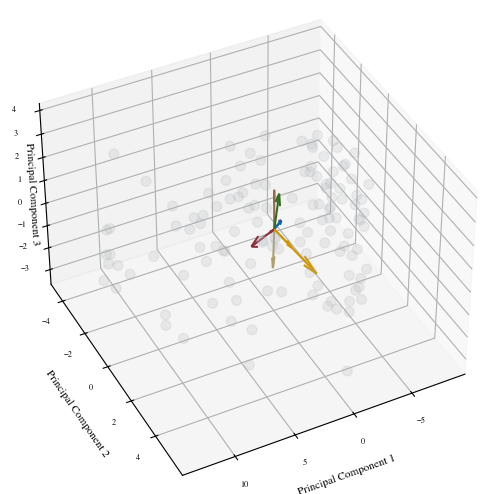

In [21]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import itertools

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(final_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

plt.rcParams.update(bundles.icml2022(column="half", nrows=5, ncols=5, usetex=False))
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3', labelpad=-15)
#ax.set_title('3 Component PCA', fontsize = 20)

ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'], alpha=0.2, s = 50, c=rgb.tue_gray)

colors = [rgb.tue_red, rgb.tue_orange, rgb.tue_gold, rgb.tue_darkgreen, rgb.tue_blue, rgb.tue_brown, rgb.tue_violet]
color_cycle = itertools.cycle(colors)

# Adding the arrows:
scale_factor = 3  # Increase this for larger arrows
for i in range(pca.components_.shape[1]):
    ax.quiver(0, 0, 0, pca.components_[0, i]*scale_factor, pca.components_[1, i]*scale_factor, pca.components_[2, i]*scale_factor, color=next(color_cycle))

ax.view_init(elev=40., azim=63)

plt.savefig('3-component-pca.pdf')
plt.show()
